# Movie Recommendation System 

### INTRODUCTION 
In this exciting study, we explore the field of movie recommendations by utilizing the MovieLens dataset from the University of Minnesota's GroupLens research lab. The primary objective of our project is to create an advanced model that uses user ratings of previous films to suggest the top 5 movies to consumers.

### PROJECT OVERVIEW
### Business Understanding
This movie recommendation system is designed to benefit the following stakeholders:

- Users: Movie enthusiasts seeking personalized movie suggestions based on their preferences and viewing history.

- Streaming Platform: The platform hosting the movie recommendation system, aiming to enhance user satisfaction and engagement.

- Content Providers: Movie studios and content creators interested in understanding user preferences and trends to optimize their content offerings.



### Problem Statement
Current systems frequently struggle with inadequate personalization, providing generic recommendations that do not correspond with the tastes of specific users. This gap leads to user annoyance and diminished engagement, diminishing the potential for streaming platforms to increase user pleasure. Second, because there is a widespread issue with cold starts, the algorithm performs poorly when it comes to new users or movies because there is insufficient history data to make initial recommendations accurately. It is critical to address these problems in order to create a recommendation system that appeals to consumers, changes with their tastes, and offers a varied and interesting viewing experience.

### Objectives
Build a model that provides top 5 movie recommendations to a user, based on their ratings of other movies.

### DATA UNDERSTANDING
The dataset (ml-latest-small) consists of 100,836 ratings and 3,683 tag applications across 9,742 movies. The data were generated by 610 users between March 29, 1996, and September 24, 2018.
The data used in this project will be pulled from 4 different separate file:

1. Movies Data (movies.csv):
Contains movie information, including titles and genres with the following columns:

 * movieId: Unique identifier for each movie.
 * title: The title of the movie, which also includes the year of release in parentheses.
 * genres: A pipe-separated list of genres to categorize the movie (e.g., Action|Adventure|Comedy).

2. Links Data (links.csv):
Provides identifiers for linking to external movie-related sources (IMDb, TMDb) and has the followinf columns:

* movieId: Unique identifier for each movie, consistent with other data files.
* imdbId: Identifier for movies used by IMDb (Internet Movie Database).
* tmdbId: Identifier for movies used by TMDb (The Movie Database).

3. Ratings Data (ratings.csv):
Contains user ratings on a 5-star scale for movies and has the following columns:

* userId: ID representing the unique identifier for each user.
* movieId: Unique identifier for each movie.
* rating: User's rating for the movie on a 5-star scale with half-star increments (0.5 to 5.0).
* timestamp: The timestamp when the rating was recorded, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

4. Tags Data (tags.csv):
Contains user-generated metadata (tags) about movies and has the following columns:

* userId: ID representing the unique identifier for each user.
* movieId: Unique identifier for each movie.
* tag: User-generated metadata describing a movie, typically a single word or short phrase.
* timestamp: The timestamp when the tag was applied, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [12]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
links = pd.read_csv("data/links.csv")
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
movies = pd.read_csv("data/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings = pd.read_csv("data/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
tags = pd.read_csv("data/tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
# A funstion to load, merge and give data summary
def load_and_examine(file_path_1, file_path_2):
    try:
        #Load the data
        df1 = pd.read_csv(file_path_1)
        df2 = pd.read_csv(file_path_2)
        data = pd.merge(df1, df2, on = "movieId" )
        
        #Display the shape, columns and first five rows of the dataset
        print("-" * 50, "Dataset shape", "-" * 50)
        display(data.shape)
        print("-" * 50, "Dataset columns", "-" * 50)
        display(data.columns)
        print("-" * 50, "Dataset head", "-" * 50)
        display(data.head())
        
        #Display information about the dataset
        print("-" * 50, "Dataset information", "-" * 50)
        display(data.info())

        return data
 
 
    except FileNotFoundError:
        print(f"File '{file_path_1}, {file_path_2}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
file_path_1 = "data/movies.csv"
file_path_2 = "data/ratings.csv"
data = load_and_examine(file_path_1, file_path_2)


-------------------------------------------------- Dataset shape --------------------------------------------------


(100836, 6)

-------------------------------------------------- Dataset columns --------------------------------------------------


Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

-------------------------------------------------- Dataset head --------------------------------------------------


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


-------------------------------------------------- Dataset information --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


None

### DATA PREPARATION

### Dropping irrelevant features

In [8]:
# Dropping the "timestamp" column
data = data.drop("timestamp", axis = 1)
data.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


### Missing Values

In [9]:
# Checking for missing values in each column
missing_values = data.isna().sum()

for column, count in missing_values.items():
    print(f"The {column} column has {count} missing values")

The movieId column has 0 missing values
The title column has 0 missing values
The genres column has 0 missing values
The userId column has 0 missing values
The rating column has 0 missing values


### Duplicate Values

In [10]:
# Checking for duplicated rows
duplicated_rows = data.duplicated().sum()
print(f'The DataFrame has {duplicated_rows} duplicated rows.')

The DataFrame has 0 duplicated rows.


### EXPLORATORY DATA ANALYSIS

In [11]:
# checking different genres value count.

def find_genres(data):
    """
    Find and count genres in a movies DataFrame.

    """
    genres = {}  # dictionary to store different genre values

    for genre in data['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1

    return genres

# usage:
genre_count = find_genres(data)
genre_count

{'Adventure': 24161,
 'Animation': 6988,
 'Children': 9208,
 'Comedy': 39053,
 'Fantasy': 11834,
 'Romance': 18124,
 'Drama': 41928,
 'Action': 30635,
 'Crime': 16681,
 'Thriller': 26452,
 'Horror': 7291,
 'Mystery': 7674,
 'Sci-Fi': 17243,
 'War': 4859,
 'Musical': 4138,
 'Documentary': 1219,
 'IMAX': 4145,
 'Western': 1930,
 'Film-Noir': 870,
 '(no genres listed)': 47}

### visualization of top 5 genre and percentage ratio.

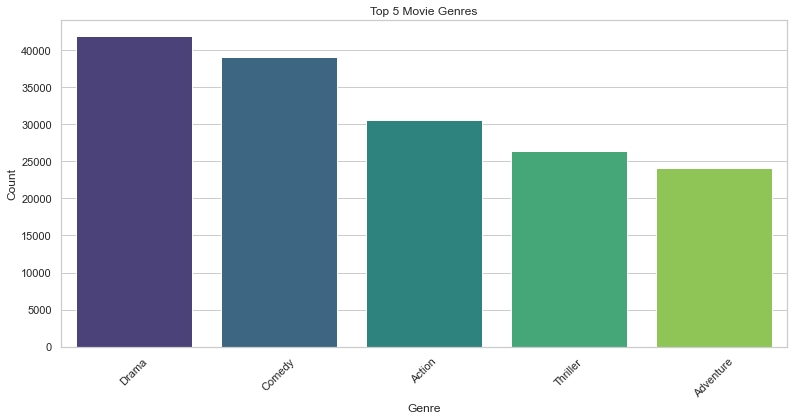

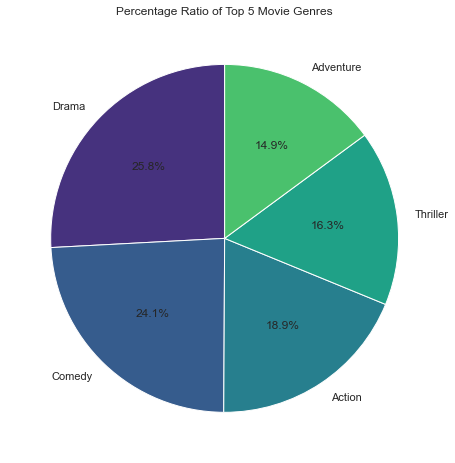

In [34]:
# visualization of top 5 genre and percentage ratio.

# Convert genre_count dictionary to a DataFrame
df_genre = pd.DataFrame(list(genre_count.items()), columns=['Genre', 'Count'])

# Sort DataFrame by Count in descending order
df_genre = df_genre.sort_values(by='Count', ascending=False)

# Select the top 5 genres
top5_genre = df_genre.head(5)


# Plotting
plt.figure(figsize=(13, 6))
sns.set(style="whitegrid")
sns.barplot(x='Genre', y='Count', data=top5_genre, palette="viridis")
plt.title('Top 5 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Pie chart for percentage ratio
plt.figure(figsize=(8, 8))
plt.pie(top5_genre['Count'], labels=top5_genre['Genre'], autopct='%1.1f%%', colors=sns.color_palette("viridis"), startangle=90)
plt.title('Percentage Ratio of Top 5 Movie Genres')
plt.show()


### Top watched movies.

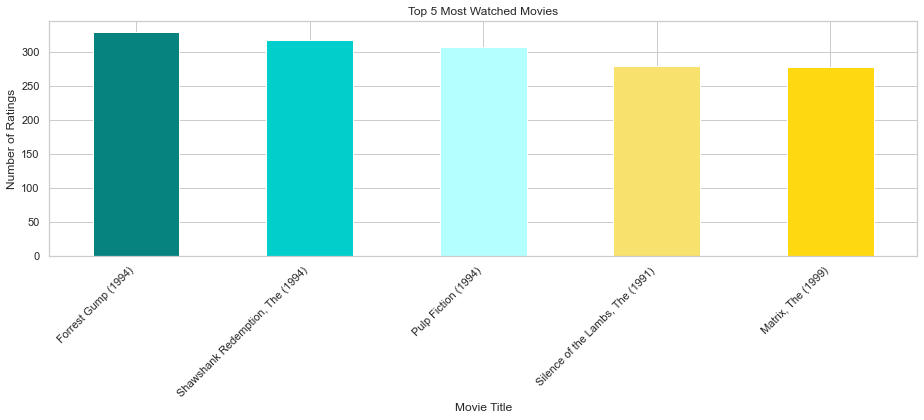

In [35]:
# Group by movie title and count the number of ratings, then sort in descending order
top_watched_movies = data.groupby('title')['rating'].count().sort_values(ascending=False).head()

# list of custom colors for the bars
custom_colors = ['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811']

# bar plot to show top watched movies.
plt.figure(figsize=(13, 6))
ax = top_watched_movies.plot(kind='bar', color=custom_colors)
plt.title('Top 5 Most Watched Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### visualization of top rated movies

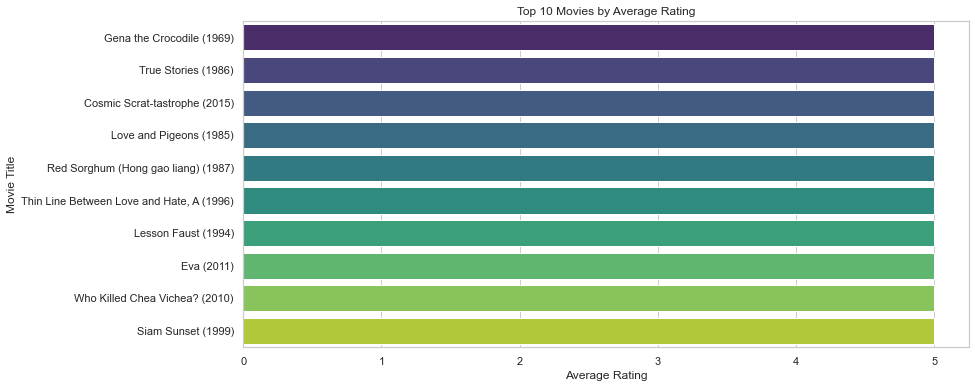

In [55]:
# the average rating for each movie
movie_ratings_count = data.groupby('title')['userId'].count().reset_index(name='num_ratings')
average_ratings = data.groupby('title')['rating'].mean().reset_index()


# Rename the columns for clarity
average_ratings.columns = ['title', 'avg_rating']

# Sort the movies by average rating in descending order
average_ratings = average_ratings.sort_values(by='avg_rating', ascending=False)

# bar plot to visualize the top 10 movies by average rating
plt.figure(figsize=(13, 6))
sns.barplot(x="avg_rating", y="title", data=round(average_ratings.head(10), 2), palette="viridis")
plt.title("Top 10 Movies by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()

### Rating distribution

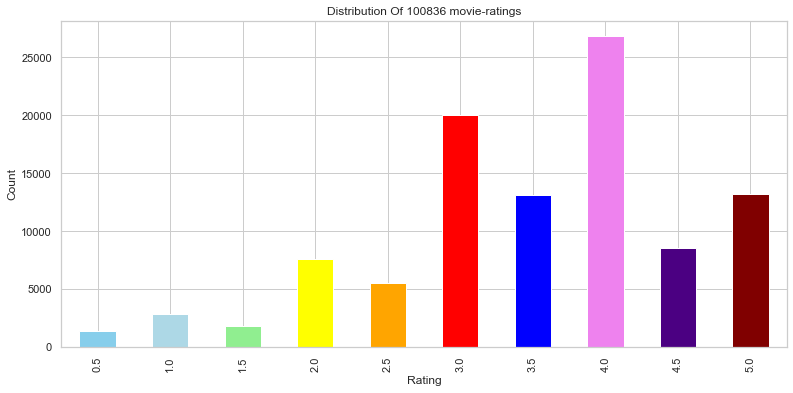

In [40]:
# count of each rating
rating_counts = data['rating'].value_counts().sort_index()

# colors for each bar
bar_colors = ['skyblue', 'lightblue', 'lightgreen', 'yellow', 'orange', 'red', 'blue', 'violet', 'indigo','maroon', 'green']

# bar graph
plt.figure(figsize=(13, 6))
ax = rating_counts.plot(kind='bar', color=bar_colors)
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Distribution Of {} movie-ratings'.format(data.shape[0]))
plt.show()

In [41]:
data.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating'], dtype='object')

In [42]:
data.head(5)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [43]:
data["title"].value_counts()

Forrest Gump (1994)                                                 329
Shawshank Redemption, The (1994)                                    317
Pulp Fiction (1994)                                                 307
Silence of the Lambs, The (1991)                                    279
Matrix, The (1999)                                                  278
                                                                   ... 
Brain Smasher... A Love Story (Bouncer and the Lady, The) (1993)      1
Nine Lives of Tomas Katz, The (2000)                                  1
Kingsglaive: Final Fantasy XV (2016)                                  1
World of Henry Orient, The (1964)                                     1
Those Happy Days (2006)                                               1
Name: title, Length: 9719, dtype: int64

In [51]:
# Assuming you have a DataFrame named ratings_df
# Group by 'movie_id' and count the number of ratings for each movie
movie_ratings_count = data.groupby('movieId')['rating'].count().reset_index()

# Filter movies with over 100 ratings
popular_movies = movie_ratings_count[movie_ratings_count['rating'] > 100]

# Merge the original ratings_df with the filtered popular movies
result_df = pd.merge(data, popular_movies, on='movieId', how='inner')
result_df.head(10)
# Now, result_df co

,movieId,title,genres,userId,rating_x,rating_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,215
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,215
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0,215
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5,215
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0,215
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0,215


In [53]:
# Filter ratings above 3 stars
high_rated_movies = data[data['rating'] > 0]

# Count the number of ratings for each movie title
movie_ratings_count = high_rated_movies.groupby('title')['userId'].count().reset_index(name='num_ratings')

# Sort the result by the number of ratings in descending order
sorted_movies = movie_ratings_count.sort_values(by='num_ratings', ascending=False)

# Display the result
print(sorted_movies)

                                 title  num_ratings
5729  Shawshank Redemption, The (1994)          289
2365               Forrest Gump (1994)          276
5171               Pulp Fiction (1994)          256
4139                Matrix, The (1999)          240
5799  Silence of the Lambs, The (1991)          239
...                                ...          ...
2994              Honey (Miele) (2013)            1
2993                      Honey (2003)            1
2989      Home for the Holidays (1995)            1
2988               Home Alone 3 (1997)            1
0                           '71 (2014)            1

[7359 rows x 2 columns]
